### Config the workspace

In [113]:
from Lab_Equipment.Config import config

### Loading the Libraries

In [1]:
# Python Libs
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import ipywidgets
# Defult Pploting properties 
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [5,5]


#NOTE
# when debuging multiprocesses code you can put thing in the queue and the look at it from outside the thread using 
# flag =digholoThread.digholo_queue.get_nowait()
# print(flag)
import TimeTagger
import Lab_Equipment.TimeTagger.TimeTaggerFunction as TimetaggerFunc
# import Lab_Equipment.TimeTagger.TimeTaggerLiveWindow as TTLiveWindow

#---------------------------#
# Loading the deformable mirror
#---------------------------#
import Lab_Equipment.DeformableMirror.DeformableMirror as DeformMirror_lib
import Lab_Equipment.AlignmentRoutines.AlignmentRoutines_DeformableMirror_TimeTagger as DM_TT_Algin_lib 
import Lab_Equipment.AlignmentRoutines.AlignmentFunctions  


Current Directory: \\uq.edu.au\uq-Research\QTLAB07-Q5982\Experiments\quantum-dot\qd-abhiroy-rdm\SLMProject
This is a Windows system.
Kinesis Software not installed. If needed to go and get software from thorlabs website, DLL's are needed for the mount to work
The deformable mirror library only works with Python 3.7, please use a virtual environment with Python 3.7,        this will be fixed in the future


In [3]:
# This is needed to Qt stuff (I think()
# %pylab inline
%matplotlib widget

%load_ext autoreload
#Config File
%aimport Lab_Equipment.Config.config

%aimport Lab_Equipment.TimeTagger.TimeTaggerFunction 
# %aimport Lab_Equipment.TimeTagger.TimeTaggerLiveWindow
%aimport Lab_Equipment.DeformableMirror.DeformableMirror
%aimport Lab_Equipment.AlignmentRoutines.AlignmentRoutines_DeformableMirror_TimeTagger
%aimport Lab_Equipment.AlignmentRoutines.AlignmentFunctions  
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### lUNCH DEFORMABLE MIRROR

In [4]:
deformMirror=DeformMirror_lib.DeformanbleMirror_Obj(serialName="BAX357")

Number of actuators: 69


#### Delete the Deformable mirror

In [ ]:
del deformMirror 

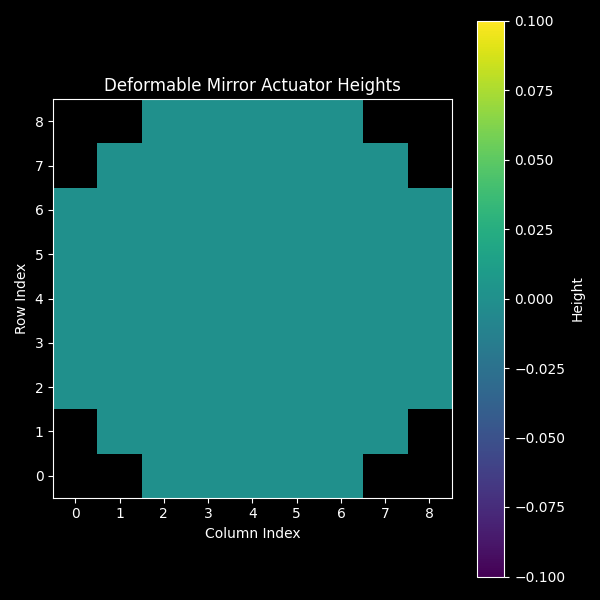

In [5]:
deformMirror.Plot_MirrorSurface()

#### Set Deformable mirror to zero

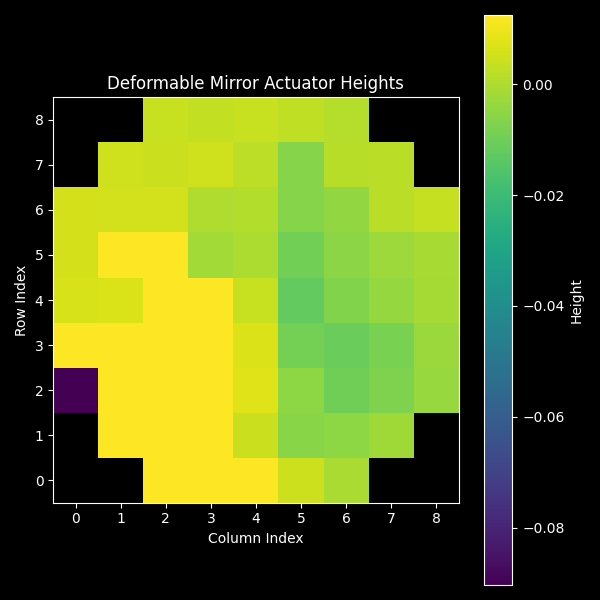

In [ ]:
# deformMirror.loadActuatorValuesFromFile('prefrixNameFile')
deformMirror.Set_MirrorToZero()
deformMirror.Plot_MirrorSurface()

### Example of how to set the Actuators. 


Becarful with this as you could be throwing light all over the place or create very tightly focused spots of dangours powers

##### Example to set the DM to linspace

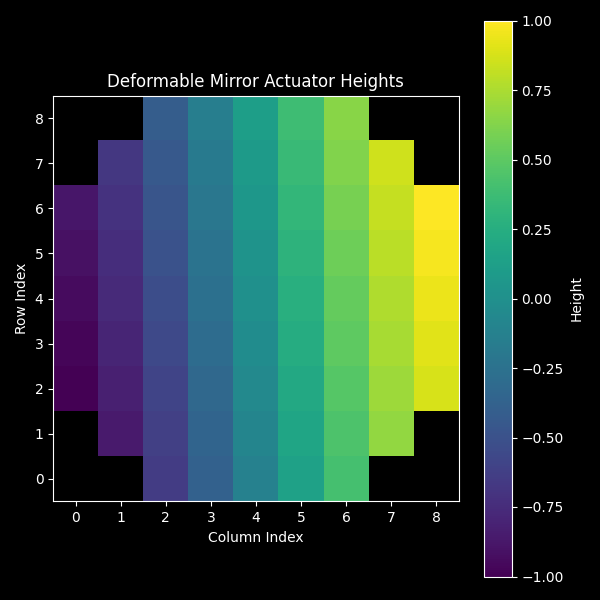

In [6]:
deformMirror.ActArr=np.linspace(-1,1,deformMirror.NumAct) #linspace of arrays
deformMirror.Set_MirrorSurface()
deformMirror.Plot_MirrorSurface()

In [37]:
np.linspace(-1,1,deformMirror.NumAct)

array([-1.        , -0.97058824, -0.94117647, -0.91176471, -0.88235294,
       -0.85294118, -0.82352941, -0.79411765, -0.76470588, -0.73529412,
       -0.70588235, -0.67647059, -0.64705882, -0.61764706, -0.58823529,
       -0.55882353, -0.52941176, -0.5       , -0.47058824, -0.44117647,
       -0.41176471, -0.38235294, -0.35294118, -0.32352941, -0.29411765,
       -0.26470588, -0.23529412, -0.20588235, -0.17647059, -0.14705882,
       -0.11764706, -0.08823529, -0.05882353, -0.02941176,  0.        ,
        0.02941176,  0.05882353,  0.08823529,  0.11764706,  0.14705882,
        0.17647059,  0.20588235,  0.23529412,  0.26470588,  0.29411765,
        0.32352941,  0.35294118,  0.38235294,  0.41176471,  0.44117647,
        0.47058824,  0.5       ,  0.52941176,  0.55882353,  0.58823529,
        0.61764706,  0.64705882,  0.67647059,  0.70588235,  0.73529412,
        0.76470588,  0.79411765,  0.82352941,  0.85294118,  0.88235294,
        0.91176471,  0.94117647,  0.97058824,  1.        ])

##### To Put to zero

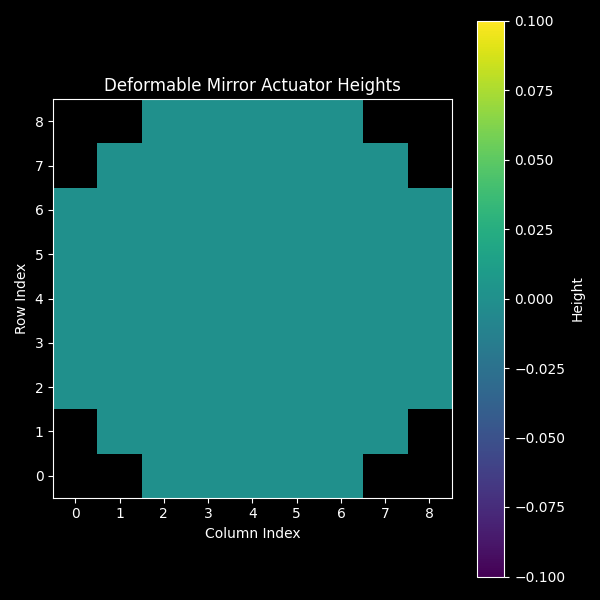

In [15]:
deformMirror.ActArr=np.zeros(deformMirror.NumAct) 
deformMirror.Set_MirrorSurface()
deformMirror.Plot_MirrorSurface()

In [14]:
#deformMirror.saveActuatorValuesFromFile('test')


# or you can make a array and pass that in to the Set_MirrorSurface like this
# New_mirrorSurface=np.linspace(-1,1,deformMirror.NumAct)
# deformMirror.Set_MirrorSurface(New_mirrorSurface)

### Load and save array for furture load

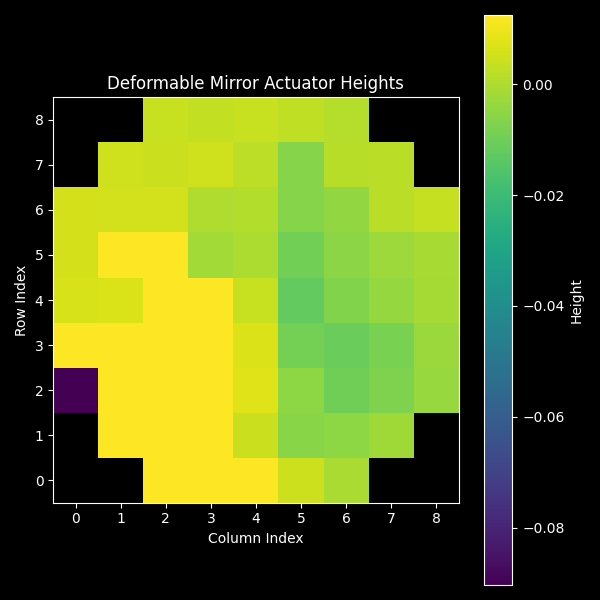

In [55]:
#-----------------#
#To save the array for future use
#-----------------#
deformMirror.saveActuatorValuesFromFile('1st') 
deformMirror.Plot_MirrorSurface()

Cleaning up AlginmentObj_DM_TT


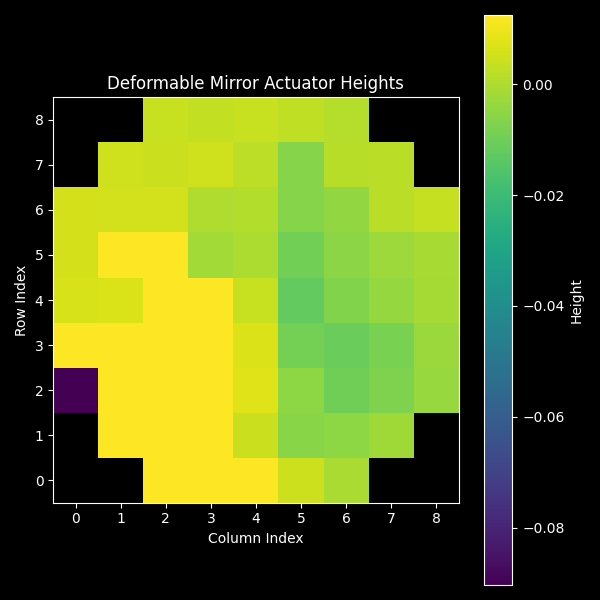

In [74]:
deformMirror.loadActuatorValuesFromFile('1st')
deformMirror.Set_MirrorSurface()
deformMirror.Plot_MirrorSurface()

### Lauch a time tagger

In [12]:
#-------#
#To open and close the time-tagger 
#-------#
opentagger= 0 #0 to disconnect the tagger.

if opentagger==1:
    tagger=TimeTagger.createTimeTagger()
else:    
    TimeTagger.freeTimeTagger(tagger)

### quick check tagger is grabbing data

In [7]:
avgCount=20
Counts_avg_arr=np.zeros(avgCount)
for iavg in range(avgCount):
    Counts_avg_arr[iavg]=TimetaggerFunc.getCountrate(tagger, measurementChannel=1,countingTime=0.5,clearbuffer=True)

print(np.mean(Counts_avg_arr))
print(np.std(Counts_avg_arr))

158566.4
11097.201099376365


## make a alignment object for the timetagger and deformable mirror

In [8]:
AlginDMTT_obj=DM_TT_Algin_lib.AlginmentObj_DM_TT(Tagger=tagger,DeformableMirror=deformMirror)

In [9]:
deformMirror.RefreshRate =10e-3
InitialStepSizes=np.ones(deformMirror.NumAct)*(0.1)

In [10]:
Optimiser='Nelder-Mead'
#Optimiser='CMA-ES'
#Optimiser='Powell'


AlginDMTT_obj.MultiDimAlignmentOfDM(Optimiser=Optimiser,
                              GoalMetric=DM_TT_Algin_lib.DM_TT_Metrics.Counts,
                              measurementChannel=1,
                              binWidth=100000,
                              countingTime=0.5,
                               PropertiesToAlign=None,
                               InitialStepSizes=InitialStepSizes,
                               ErrTol=3000,
                               maxAttempts=100,
                               populationSize=None,
                               simga0=0.2,)


No array was given for actuators to align so all actuators will be aligned
Func Evals: 1 Metric: [156714.]
x values = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Func Evals: 2 Metric: [166262.]
x values = [0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
Func Evals: 3 Metric: [170624.]
x values = [0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
Func Evals: 4 Metric: [168030

[-193202.]


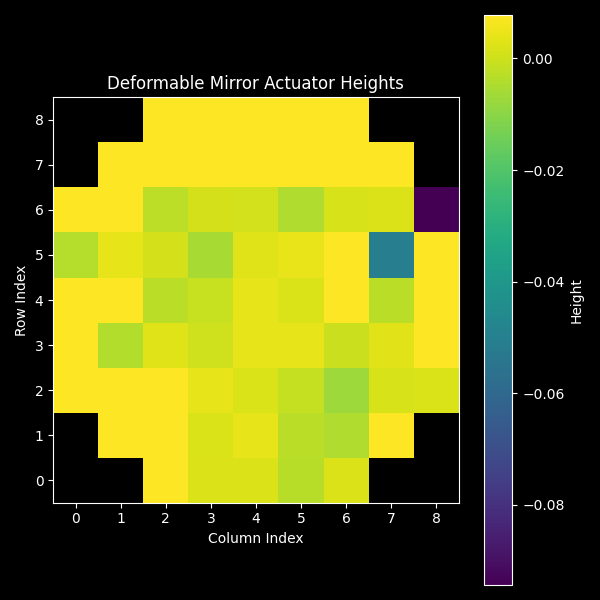

In [11]:
deformMirror.Set_MirrorSurface(AlginDMTT_obj.bestVetex)
print(AlginDMTT_obj.BestMetric)
deformMirror.Plot_MirrorSurface()

In [100]:
plt.plot(correlationTimebins_data,correlation_dataNorm)
vis=TimetaggerFunc.VisibiliityCal(correlationTimebins_data,correlation_dataNorm)

NameError: name 'correlationTimebins_data' is not defined

In [58]:
print(vis)

NameError: name 'vis' is not defined

(array([-50000000, -49999900, -49999800, ...,  49999700,  49999800,
         49999900], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0., 0., 0., ..., 0., 0., 0.]))

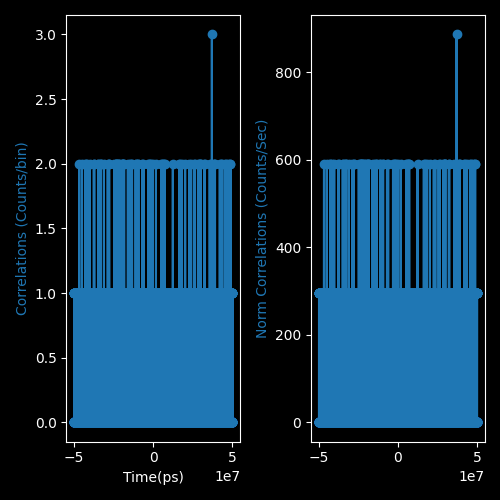

In [103]:
TimetaggerFunc.getCorrelations(tagger, measurementChannels=[1,4], binWidth=100, binNum=1000000,countingTime=2,PlotResutls=True)

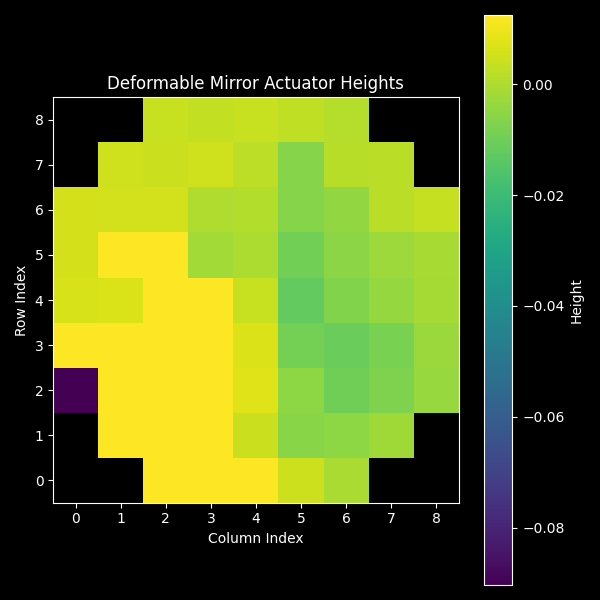

In [75]:
deformMirror.Plot_MirrorSurface()